In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb, reuters, mnist, cifar10

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [171]:
df = pd.read_csv('drive/MyDrive/project-4/fashion-mnist_train.csv')

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(60000, 785)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [8]:
X = df.drop(columns='label')
y = df['label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2023)

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [11]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [12]:
# Minmax sacle
X_train = X_train / 255
X_test = X_test / 255

In [13]:
X_train.shape

(48000, 28, 28, 1)

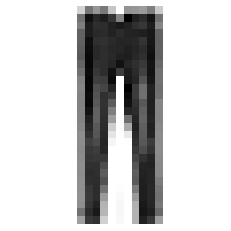

In [14]:
plt.axis('off')
plt.imshow(X_train[0], cmap='binary');

In [100]:
# First model, normal
# Interpretation
# 

model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [101]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='rmsprop',
    metrics=['acc']
)

In [102]:
history2 = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=10
)

Epoch 1/10
188/188 [==============================] - 2s 8ms/step - loss: 0.7475 - acc: 0.7335 - val_loss: 0.5335 - val_acc: 0.8027
Epoch 2/10
188/188 [==============================] - 1s 7ms/step - loss: 0.4758 - acc: 0.8280 - val_loss: 0.4460 - val_acc: 0.8329
Epoch 3/10
188/188 [==============================] - 1s 7ms/step - loss: 0.4116 - acc: 0.8536 - val_loss: 0.3802 - val_acc: 0.8640
Epoch 4/10
188/188 [==============================] - 1s 7ms/step - loss: 0.3745 - acc: 0.8662 - val_loss: 0.3544 - val_acc: 0.8720
Epoch 5/10
188/188 [==============================] - 2s 8ms/step - loss: 0.3486 - acc: 0.8762 - val_loss: 0.3382 - val_acc: 0.8789
Epoch 6/10
188/188 [==============================] - 1s 8ms/step - loss: 0.3293 - acc: 0.8828 - val_loss: 0.3487 - val_acc: 0.8731
Epoch 7/10
188/188 [==============================] - 1s 7ms/step - loss: 0.3146 - acc: 0.8886 - val_loss: 0.3124 - val_acc: 0.8900
Epoch 8/10
188/188 [==============================] - 1s 7ms/step - loss: 0.

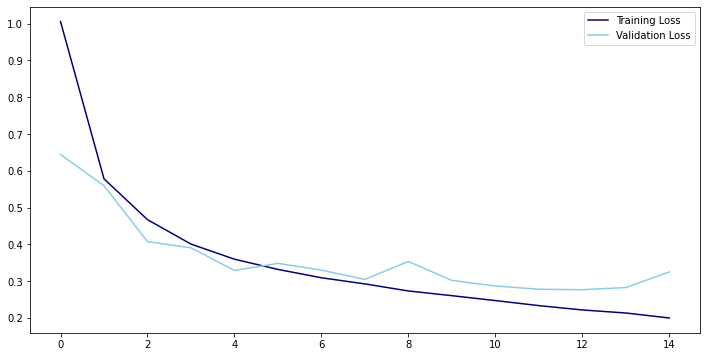

In [103]:
# Check out the plot of loss vs epoch. How's our model?
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='skyblue', label='Validation Loss')
plt.legend();

In [80]:
# Second model

model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='rmsprop',
    metrics=['acc']
)

In [81]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=10
)

188/188 [==============================] - 2s 8ms/step - loss: 0.7765 - acc: 0.7157 - val_loss: 0.5540 - val_acc: 0.7898
Epoch 2/10
188/188 [==============================] - 1s 8ms/step - loss: 0.4799 - acc: 0.8276 - val_loss: 0.4853 - val_acc: 0.8195
Epoch 3/10
188/188 [==============================] - 2s 8ms/step - loss: 0.4114 - acc: 0.8533 - val_loss: 0.3809 - val_acc: 0.8620
Epoch 4/10
188/188 [==============================] - 1s 7ms/step - loss: 0.3755 - acc: 0.8672 - val_loss: 0.3825 - val_acc: 0.8542
Epoch 5/10
188/188 [==============================] - 1s 8ms/step - loss: 0.3509 - acc: 0.8760 - val_loss: 0.3618 - val_acc: 0.8648
Epoch 6/10
188/188 [==============================] - 1s 7ms/step - loss: 0.3307 - acc: 0.8817 - val_loss: 0.3437 - val_acc: 0.8742
Epoch 7/10
188/188 [==============================] - 1s 7ms/step - loss: 0.3148 - acc: 0.8865 - val_loss: 0.3331 - val_acc: 0.8748
Epoch 8/10
188/188 [==============================] - 1s 7ms/step - loss: 0.3010 - acc:

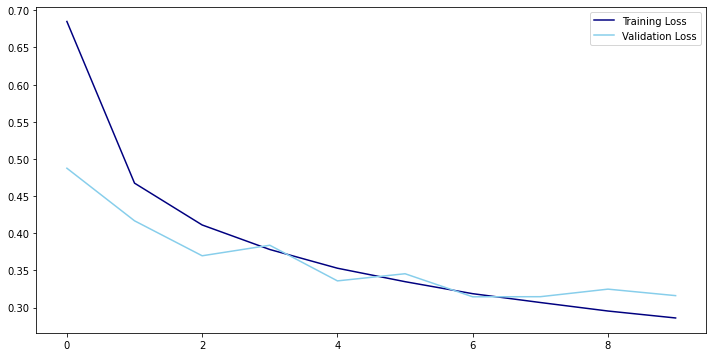

In [53]:
# Check out the plot of loss vs epoch. How's our model?
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='skyblue', label='Validation Loss')
plt.legend();

In [163]:
# Third model

model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam',
    metrics=['acc']
)

In [164]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=10
)

Epoch 1/10
188/188 [==============================] - 4s 11ms/step - loss: 0.8182 - acc: 0.7021 - val_loss: 0.5018 - val_acc: 0.8139
Epoch 2/10
188/188 [==============================] - 2s 9ms/step - loss: 0.4974 - acc: 0.8189 - val_loss: 0.4115 - val_acc: 0.8481
Epoch 3/10
188/188 [==============================] - 1s 8ms/step - loss: 0.4403 - acc: 0.8396 - val_loss: 0.3722 - val_acc: 0.8712
Epoch 4/10
188/188 [==============================] - 2s 9ms/step - loss: 0.4060 - acc: 0.8551 - val_loss: 0.3503 - val_acc: 0.8753
Epoch 5/10
188/188 [==============================] - 1s 8ms/step - loss: 0.3794 - acc: 0.8646 - val_loss: 0.3367 - val_acc: 0.8786
Epoch 6/10
188/188 [==============================] - 2s 8ms/step - loss: 0.3622 - acc: 0.8700 - val_loss: 0.3224 - val_acc: 0.8871
Epoch 7/10
188/188 [==============================] - 1s 8ms/step - loss: 0.3487 - acc: 0.8748 - val_loss: 0.3056 - val_acc: 0.8903
Epoch 8/10
188/188 [==============================] - 2s 9ms/step - loss: 0

In [162]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2804048955440521
Test accuracy: 0.8958333134651184


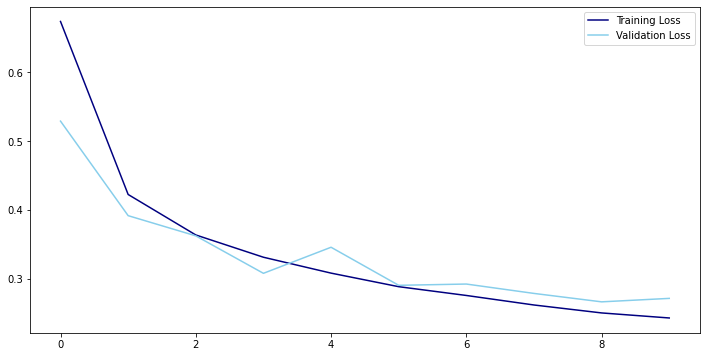

In [69]:
# Check out the plot of loss vs epoch. How's our model?
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='skyblue', label='Validation Loss')
plt.legend();

In [155]:
# Four Model
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

In [156]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=15
)

Epoch 1/15
188/188 [==============================] - 4s 10ms/step - loss: 0.7117 - accuracy: 0.7432 - val_loss: 0.4969 - val_accuracy: 0.8116
Epoch 2/15
188/188 [==============================] - 2s 9ms/step - loss: 0.4304 - accuracy: 0.8435 - val_loss: 0.3756 - val_accuracy: 0.8658
Epoch 3/15
188/188 [==============================] - 2s 8ms/step - loss: 0.3622 - accuracy: 0.8697 - val_loss: 0.3460 - val_accuracy: 0.8735
Epoch 4/15
188/188 [==============================] - 1s 8ms/step - loss: 0.3275 - accuracy: 0.8809 - val_loss: 0.3198 - val_accuracy: 0.8824
Epoch 5/15
188/188 [==============================] - 1s 8ms/step - loss: 0.2992 - accuracy: 0.8918 - val_loss: 0.3214 - val_accuracy: 0.8829
Epoch 6/15
188/188 [==============================] - 1s 8ms/step - loss: 0.2791 - accuracy: 0.8997 - val_loss: 0.2875 - val_accuracy: 0.8946
Epoch 7/15
188/188 [==============================] - 1s 8ms/step - loss: 0.2586 - accuracy: 0.9059 - val_loss: 0.2818 - val_accuracy: 0.8938
Epoch

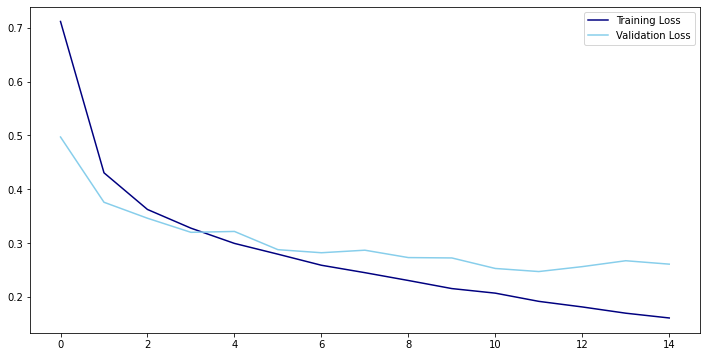

In [157]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='skyblue', label='Validation Loss')
plt.legend();

In [158]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2606213092803955
Test accuracy: 0.9081666469573975


In [168]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
test = pd.read_csv('drive/MyDrive/project-4/fashion-mnist_test.csv')
actual = test['label']
test = test.drop(columns='label')
test = np.array(test)
test = test.reshape(-1, 28, 28, 1)

In [180]:
y_pred = np.argmax(model.predict(test), axis=1)
y_pred

313/313 [==============================] - 1s 3ms/step


array([0, 1, 6, ..., 8, 8, 1])

<Axes: >

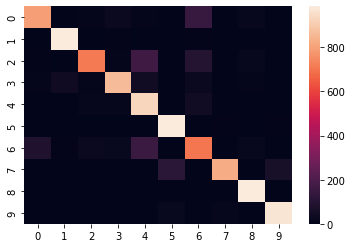

In [182]:
x = confusion_matrix(actual, y_pred)
sns.heatmap(x)

In [188]:
predictions = pd.DataFrame(y_pred, columns=['Label'])
predictions.index +=1
# predictions = predictions.set_index('ImageId')
predictions
filename = 'submission_2.csv'
predictions.to_csv(f'drive/MyDrive/project-4/{filename}', index=False)

In [187]:
predictions.head()

,Label
1,0
2,1
3,6
4,6
5,3


In [ ]:
|